
### About Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. Data was collected for 50 days, from February 11th to March 31st, 2022. Data source was secondary data and was collected from Ease my trip website.


### Features

The various features of the cleaned dataset are explained below:
1. *Airline*: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. *Flight*: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. *Source City*: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. *Departure Time*: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. *Stops*: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. *Arrival Time*: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. *Destination City*: City where the flight will land. It is a categorical feature having 6 unique cities.
8. *Class*: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. *Duration*: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. *Days Left*: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. *Price*: Target variable stores information of the ticket price.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("data/Clean_Dataset.csv", index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.70,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# check missing value
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
# duplicate check
df.duplicated().sum()

0

There are no missing values.

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221023,7.191995,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,NaN,NaN,NaN,26.004751,13.561004,1.0,15.0,26.0,38.0,49.0


### Let's check distribution-

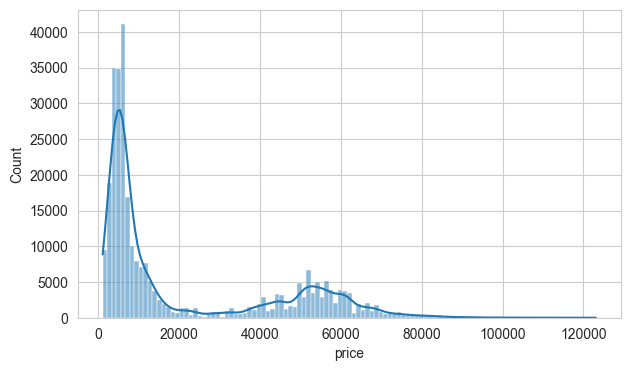

In [10]:
plt.figure(figsize = (7, 4))
sns.histplot(x ='price', data = df, kde = True)
plt.show()

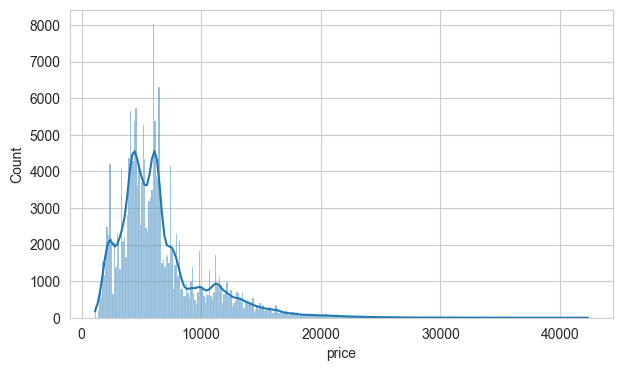

In [11]:
plt.figure(figsize = (7,4))
sns.histplot(x = 'price', data = df[df['class'] == "Economy"], kde = True)
plt.show()

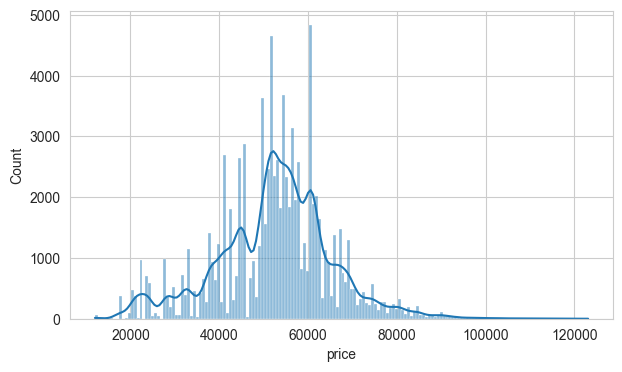

In [12]:
plt.figure(figsize = (7,4))
sns.histplot(x = 'price', data = df[df['class'] != "Economy"], kde = True)
plt.show()

In [14]:
df.price.median(), df.price.mean()

(7425.0, 20889.660523133203)

Even though the mean is around 20000, we can see here that the median is approximately 7400.

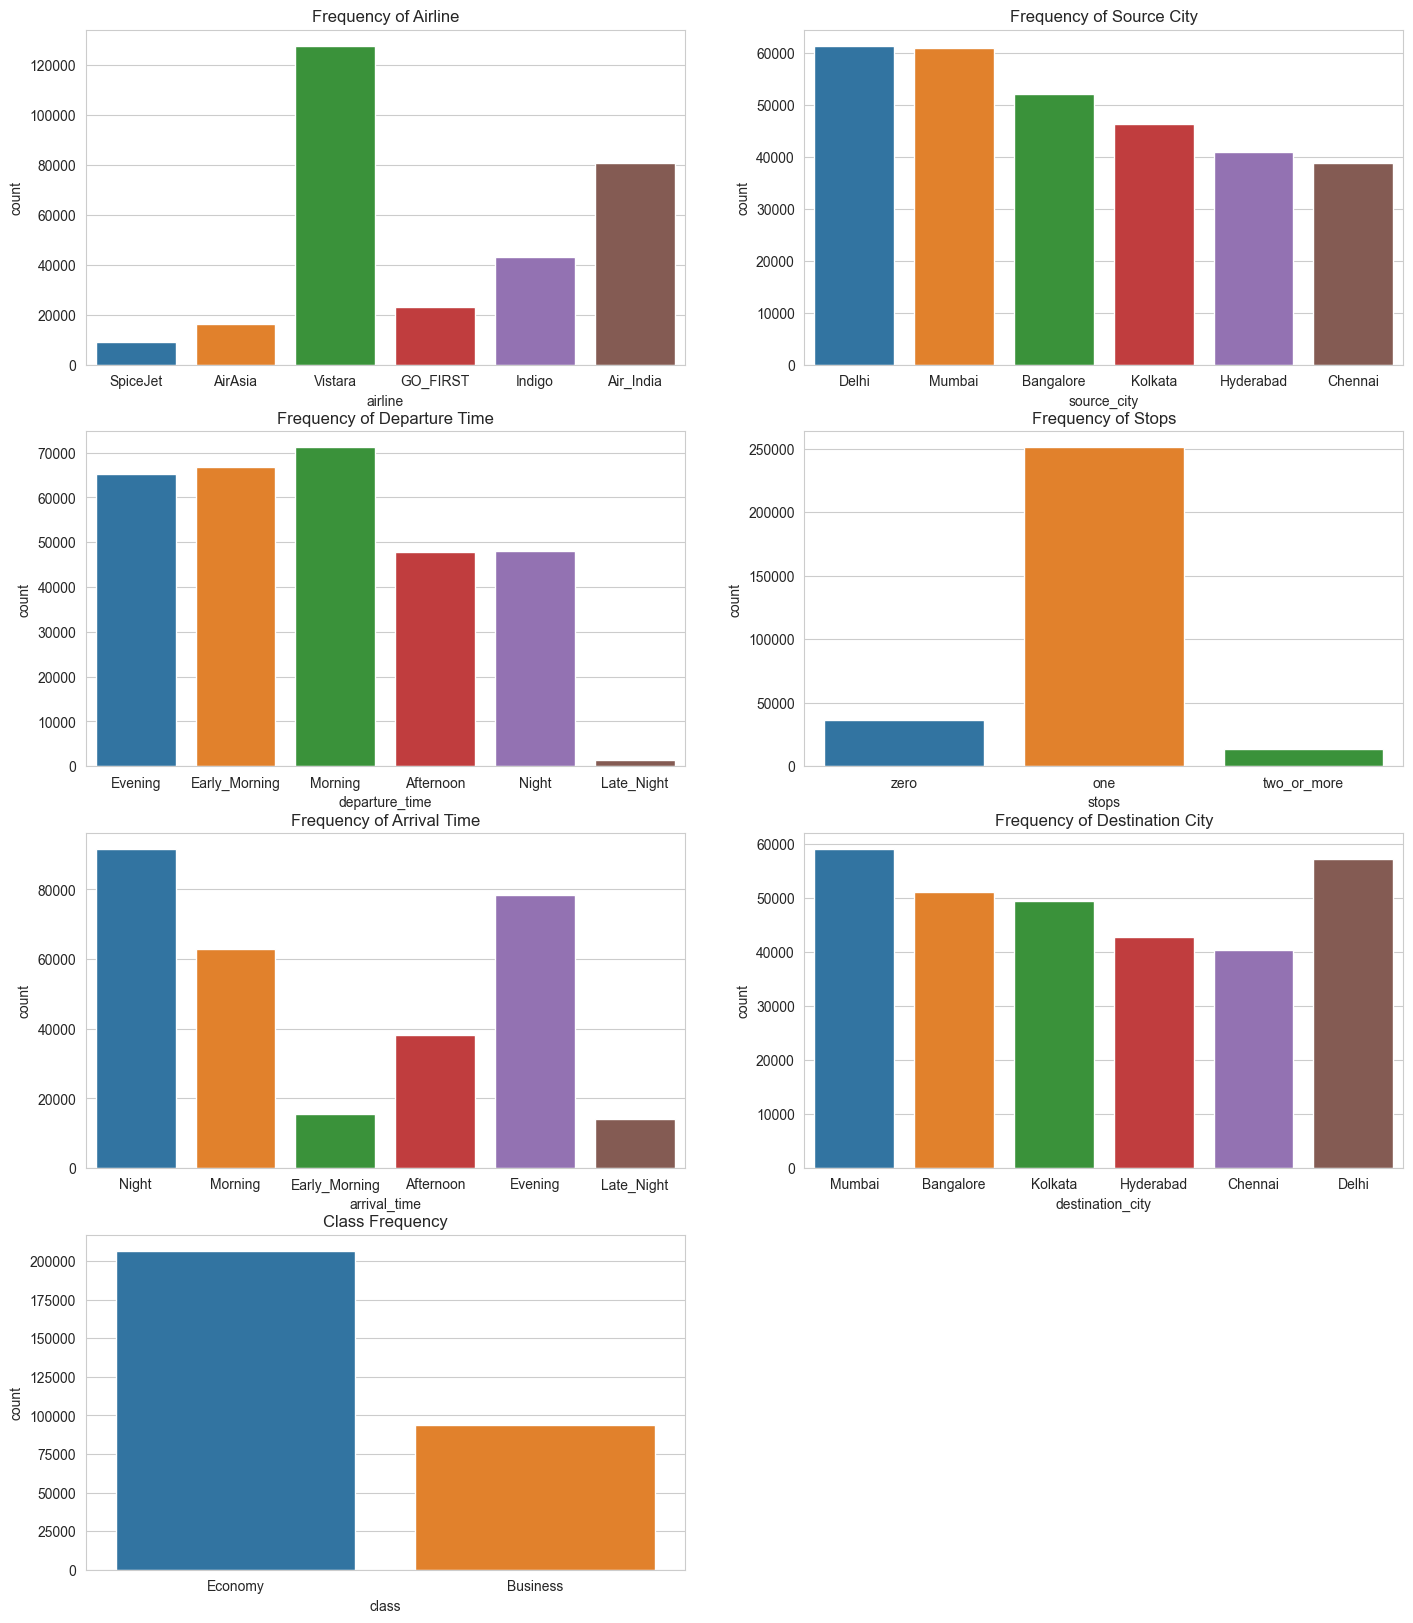

In [15]:
# Visualizations of categoric features with countplot
plt.figure(figsize=(17,20))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()



### How does the ticket price vary between Economy and Business class?

To visualize the difference between the two kind of tickets, I will plot the prices for the two prices for both business and economy tickets for the different companies.

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='airline', y='price', hue="class",
            data=df.sort_values("price")
            )
plt.show()

📌 Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

### Does price vary with Airlines?

To compare the prices between the companies we will only compare the same kind of tickets since the previous question showed that the class has a big impact on the final price.

In [ ]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 3]}, figsize=(25, 12))

sns.violinplot(y = "price", x = "airline",
               data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False),
               kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)

sns.violinplot(y = "price", x = "airline",
               data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False),
               kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)
plt.show()

 📌 There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.



### How is the price affected when tickets are bought in just 1 or 2 days before departure?

To visualize how the prices changes depending on the number of days left, I will calculate the average price depending on the days left, to try to understand a pattern in the curve.

In [ ]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
df_temp.head()

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left",
                     y="price", data=df_temp)
ax.set_title("Average prizes depending on the days left",fontsize=15)
plt.show()

It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, and a positive monotone curve between 20 and 2 days before.

In [ ]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left,
            y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)

sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left,
            y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)

sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left,
            y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)
plt.show()

A pattern is clearly visible in the way prices evolve depending on the days left.

📌 The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

### Does the price change with the duration of the flight?

Let's see how the duration of the flight may affect the final price.

In [ ]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp)
ax.set_title("Average prizes depending on the duration",fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp)
ax.set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)
plt.show()

📌 It is clear that here the relationship is not linear. The prices reaches a high price at a duration of 20 hours before lowering again.
However some outliers seem to affect the regression curve .



### Does ticket price change based on the departure time and arrival time?

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False)
ax.set_title("Airline prices based on the departure time",fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False)
ax.set_title("Airline prices based on the arrival time",fontsize=15)
plt.show()

📌 As expected, leaving at late night or arriving at late night remains the cheapest way to travel.

### How the price changes with change in Source and Destination?

To answer this question, I will visualize the different prices for all the destinations as a departure and arrival destination.

In [ ]:
ax = sns.relplot(col="source_city", y="price",
                 kind="line",x='destination_city',
                 data=df,col_wrap=3)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

📌 On one hand, it seems that flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest deatination to go probably because as a capital cities, the airport is the biggest and proposes more flights. In an other hand, the prices are more or less similar and Hyderabad being the most expensive destination.


### Does the number of stops influences the price?

Let's see how the number of stop may influence the final price.

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)

sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

📌 It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.


### What variables influence most the price?

In [ ]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)

    #One-hot encoding for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    return df

In [ ]:
df_preprocessed = preprocessing(df)

In [ ]:
df_preprocessed.corr()

To visualize the linear importance of each variables on the target, I will plot a correlation matrix.

In [ ]:
plt.figure(figsize = (20, 18))
sns.heatmap(df_preprocessed.corr(), annot = True,
            vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')
plt.show()

## Basic prediction without any tuning and feature engineering

In [ ]:
X = df_preprocessed.copy()
y = X.pop("price")

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=1,
                                                test_size=0.3, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
# from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

models = {}
models["LinearRegression"]={"model":LinearRegression()}
models["KNeighborsRegressor"]={"model":KNeighborsRegressor()}
# models["XGBRegressor"]={"model":XGBRegressor()}
# models["CatBoostRegressor"]={"model":CatBoostRegressor()}



In [ ]:
models

In [ ]:
for name, model in models.items():
    trained_model = model["model"].fit(x_train, y_train)
    y_pred = trained_model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred )
    print("--- "+name+" ---")
    print(f"mean_absolute_error: {mae}")

# Quick data quality check

In [ ]:
df.head()

In [ ]:
# check city name ok or not
df.destination_city.unique()

In [ ]:
# days left check
df.days_left.unique()

In [ ]:
df[df['price'] <= 0]

In [ ]:
# null value check
df.isna().sum()

In [ ]:
# checking duplicate
df.duplicated().sum()

# Feature engneering

In [ ]:
df.head()

In [ ]:
#Encode the ordinal variables "stops" and "class".
df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
df.head()

In [ ]:
#One-hot encoding for the cities, the times and the airlines.
df_feature = df.copy()

dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]

dummies = pd.get_dummies(df_feature[dummies_variables])
df_feature = pd.concat([df_feature, dummies], axis=1)
df_feature = df_feature.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
df_feature.head()

In [ ]:
for i in df.columns:
    if df[i].nunique()> 10:
        print(i, df[i].nunique())

In [ ]:
# Plot distribution
plt.figure(figsize=(7, 10))
plt.subplot(2, 1, 1)
sns.histplot(df["duration"], kde=True, bins=10)

plt.subplot(2, 1, 2)
sns.histplot(df["days_left"], kde=True, bins=10)
# Show the plot
plt.show()

In [ ]:
from scipy.stats import yeojohnson

# apply yeo-johnson for normal distribution
# Plot distribution
plt.figure(figsize=(7, 10))

for idx, col in enumerate(["duration", "days_left"]):
    y, lmbda = yeojohnson(df[col])
    # df[col] = y
    plt.subplot(2, 1, idx+1)
    sns.histplot(y, kde=True, bins=10)

# Show the plot
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import mlflow
from mlflow import log_metric, log_param, log_artifact
import pickle


def test_mae(df):
    TRACKING_SERVER_HOST = 'localhost'
    mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")
    mlflow.set_experiment('EDA_v1')
    X = df.copy()
    y = X.pop("price")
    x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=1,
                                                    test_size=0.3, shuffle=True)
    models = {}
    models["LinearRegression"]={"model":LinearRegression()}
    # models["KNeighborsRegressor"]={"model":KNeighborsRegressor()}
    # models["XGBRegressor"]={"model":XGBRegressor()}
    # models["CatBoostRegressor"]={"model":CatBoostRegressor(verbose=0)}

    for name, model in models.items():
        # with mlflow.start_run():
            log_param('model_name', name)
            log_param('one-hot-encoding', True)
            log_param('transformer', 'yeojhonson')
            trained_model = model["model"].fit(x_train, y_train)
            y_pred = trained_model.predict(x_test)
            mae = mean_absolute_error(y_test, y_pred )
            log_metric('MAE', mae)
            print("--- "+name+" ---")
            filename = f"model/{name}"
            print(f"mean_absolute_error: {mae}")
            # pickle.dump(trained_model, open(filename, 'wb'))
            # log_artifact(filename)
            model_info = mlflow.sklearn.log_model(trained_model, filename)
            # Register the model
            registered_model = mlflow.register_model(model_info.model_uri, filename)
            mlflow.end_run()



In [ ]:
col = "duration"

y, _ = yeojohnson(df_feature[col])
df_feature[col] = y
test_mae(df_feature)


In [ ]:
import sklearn.preprocessing as preproc

# Standardization
cols = ["duration", "days_left"]
# Standardization - note that by definition, some outputs will be negative
df_feature[cols] = preproc.StandardScaler().fit_transform(df_feature[cols])
# test
test_mae(df_feature)

In [ ]:
cut_labels = ['One_day', '2_19', '20_50']
cut_bins = [0, 1, 19, 50]

df['days_left_binning'] = pd.cut(df['days_left'], bins=cut_bins, labels=cut_labels)
df[["days_left_binning", "days_left"]]

In [ ]:
df_feature["days_left_binning"] = df["days_left_binning"]

dummies = pd.get_dummies(df_feature['days_left_binning'])
df_feature = pd.concat([df_feature, dummies],axis=1)
df_feature = df_feature.drop(["days_left_binning"], axis=1)
df_feature.head()


In [ ]:
test_mae(df_feature)

In [ ]:
test_mae(df_feature.drop(["One_day", "20_50"], axis=1))

In [ ]:
# didn't improve MAE
df_feature = df_feature.drop(["One_day", "20_50", "2_19"], axis=1)

In [ ]:
cut_labels = ['before_20', 'after_20']
cut_bins = [0, 19, 60]

df['duration_binning'] = pd.cut(df['duration'], bins=cut_bins, labels=cut_labels)
df[["duration_binning", "duration"]]

In [ ]:
df[["duration_binning", "duration"]].sample(5)

In [ ]:
df_feature["duration_binning"] = df["duration_binning"]

dummies = pd.get_dummies(df_feature['duration_binning'])
df_feature = pd.concat([df_feature, dummies],axis=1)
df_feature = df_feature.drop(["duration_binning"],axis=1)
df_feature.head()

In [ ]:
test_mae(df_feature)

In [ ]:
df_feature = df_feature.drop(columns=cut_labels, axis=1)
df_feature

In [ ]:
df["source_to_destinations"] = df.source_city +"_"+ df.destination_city
df.head()

In [ ]:
dummies = pd.get_dummies(df['source_to_destinations'])
df_feature = pd.concat([df_feature, dummies],axis=1)
df_feature.head()

In [ ]:
test_mae(df_feature)

# Let's try ANN

In [ ]:
df_feature

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def build_model(input_shape=34, output_shape=1, activation='relu', neuron_count=50):
    model = keras.Sequential([
        layers.Dense(neuron_count, activation=activation, input_shape=[input_shape]),
        layers.Dense(neuron_count, activation=activation),
        layers.Dense(neuron_count, activation=activation),
        layers.Dense(neuron_count, activation=activation),
        layers.Dense(neuron_count, activation=activation),
        layers.Dense(output_shape)]
        )

    # if there is no activation fuction in dense layer. then it will return sum of (weight * features + bias)
    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [ ]:

def test_ann(df, activation):
    X = df.copy()
    y = X.pop("price")
    x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=1,
                                                    test_size=0.3, shuffle=True)
    EPOCHS = 10
    # model build
    input_shape = x_train.shape[1]
    print(input_shape)
    model = build_model(input_shape= input_shape, activation=activation)
    # model.summary()

    # training and plot mse vs val_mse
    history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split = 0.1, verbose=1)
    sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mae'])
    sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mae'])
    plt.show()

    # evaluation
    loss, mae, mse = model.evaluate(x_test, y_test, verbose=0)
    print("Testing set Mean Abs Error: {:5.2f} rupee".format(mae))

In [ ]:
# relu, leaky_relu, tanh, swish
test_ann(df_feature, 'swish')
test_ann(df_feature, 'relu')
test_ann(df_feature, 'leaky_relu')

In [ ]:
test_ann(df_feature, 'relu')

# Outlier

In [ ]:
# df_feature.head()
df_feature['class'].unique()

In [ ]:
price = df_feature[df_feature['class'] == 0].price
lower_limit = price.mean() - 3*price.std()
upper_limit = price.mean() + 3*price.std()
print("economy: ")
print(lower_limit)
print(upper_limit)
cls_eco = df_feature[(df_feature['class'] == 0) &
                     (df_feature['price'] >= lower_limit) &
                     (df_feature['price'] <= upper_limit)].index


price = df_feature[df_feature['class'] == 1].price
lower_limit = price.mean() - 3*price.std()
upper_limit = price.mean() + 3*price.std()
print("Business:")
print(lower_limit)
print(upper_limit)

cls_bsn = df_feature[(df_feature['class'] == 1) &
                     (df_feature['price'] >= lower_limit) &
                     (df_feature['price'] <= upper_limit)].index

In [ ]:
df.price.max()

In [ ]:
cls_eco, cls_bsn

In [ ]:
idx = np.concatenate((cls_eco, cls_bsn))
len(idx)

In [ ]:
df.shape[0] -len(idx)

In [ ]:
df_feature.iloc[idx]

In [ ]:
test_mae(df_feature.iloc[idx])

In [ ]:
test_mae(df_feature.iloc[cls_eco])

In [ ]:
test_mae(df_feature.iloc[cls_bsn])

In [ ]:
test_ann(df_feature.iloc[idx], 'relu')


# Make decisions